# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
url = "http://api.openweathermap.org/data/2.5/weather?"

temp = []
humid = []
clouds = []
winds = []
latitude = []
longitude = []
town = []
#query_url = url + "appid=" + weather_api_key + "&q=" + "London" + "&units=imperial"
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

#lat = weather_json['coord']['lat']
#long = weather_json['coord']['lon']
#tem = weather_json['main']['temp']
#hum = weather_json['main']['humidity']
#cloud = weather_json['clouds']['all']
#wind = weather_json['wind']['speed']

for city in cities:
    #build url
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    #Requests and convert to JSON
    weather_response = requests.get(query_url)
    print(weather_response)
    #verify if response if valid or error
    if weather_response.status_code == 200:
        weather_json = weather_response.json()
        latitude.append(weather_json['coord']['lat'])
        longitude.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp'])
        humid.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        winds.append(weather_json['wind']['speed'])
        town.append(city)
    print(city)
    
#Check if length excedes 500   
len(temp)    

<Response [200]>
kapaa
<Response [200]>
bethel
<Response [200]>
middlebury
<Response [200]>
vaini
<Response [200]>
hobart
<Response [404]>
barentsburg
<Response [200]>
tiksi
<Response [200]>
cidreira
<Response [200]>
punta arenas
<Response [404]>
jakoruda
<Response [200]>
hofn
<Response [200]>
hithadhoo
<Response [200]>
poltavka
<Response [200]>
hermanus
<Response [200]>
mehamn
<Response [200]>
kralendijk
<Response [200]>
bluff
<Response [200]>
coari
<Response [404]>
mys shmidta
<Response [200]>
ushuaia
<Response [200]>
torbay
<Response [200]>
mataura
<Response [200]>
dryden
<Response [200]>
norman wells
<Response [200]>
yellowknife
<Response [404]>
barawe
<Response [200]>
albany
<Response [200]>
high level
<Response [200]>
angoche
<Response [200]>
luderitz
<Response [200]>
cherskiy
<Response [200]>
puerto ayacucho
<Response [200]>
bambous virieux
<Response [404]>
belushya guba
<Response [200]>
kutum
<Response [200]>
aksu
<Response [200]>
bacum
<Response [200]>
xingcheng
<Response [200

<Response [200]>
kindu
<Response [404]>
maghama
<Response [200]>
puerto el triunfo
<Response [200]>
ostrovnoy
<Response [404]>
zolotinka
<Response [200]>
villa carlos paz
<Response [200]>
omboue
<Response [404]>
safwah
<Response [200]>
kadaya
<Response [200]>
buchanan
<Response [200]>
fort nelson
<Response [200]>
kemijarvi
<Response [200]>
talara
<Response [200]>
namatanai
<Response [200]>
shimoda
<Response [200]>
truth or consequences
<Response [200]>
picota
<Response [200]>
grand gaube
<Response [200]>
gornopravdinsk
<Response [200]>
saskylakh
<Response [200]>
saint-joseph
<Response [200]>
trelew
<Response [200]>
kyzyl-suu
<Response [404]>
rungata
<Response [200]>
pimampiro
<Response [200]>
hingham
<Response [200]>
pachino
<Response [200]>
fort morgan
<Response [404]>
kebemer
<Response [404]>
kadykchan
<Response [200]>
rexburg
<Response [200]>
talnakh
<Response [200]>
sao joao da barra
<Response [200]>
lasa
<Response [200]>
nanortalik
<Response [200]>
raudeberg
<Response [200]>
zhark

555

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
#checking length is all equal
print(len(temp))
print(len(humid))
print(len(clouds))
print(len(winds))
print(len(latitude))
print(len(longitude))
print(len(town))

weather_data = pd.DataFrame({
    "City" : town,
    "Lat": latitude,
    "Lon": longitude,
    "Temp": temp,
    "Humidity": humid,
    "Wind Speed": winds,
    "Clouds": clouds
})
weather_data.to_csv("Weather_data.csv")
weather_data.head()

NameError: name 'temp' is not defined

In [1]:
#RUN FIRST CELL FOR IMPORTS, Then run cells below this cell. Data is already collected to CSV.

NameError: name 'weather_data' is not defined

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [2]:
weather_file = "Weather_data.csv"
weather_df = pd.read_csv(weather_file)
weather_df.loc[weather_df["Humidity"] > 100]
#no cities humidity is > 100%

,Unnamed: 0,City,Lat,Lon,Temp,Humidity,Wind Speed,Clouds


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [3]:
weather_df


,Unnamed: 0,City,Lat,Lon,Temp,Humidity,Wind Speed,Clouds
0,0,kapaa,22.08,-159.32,82.31,74,13.87,75
1,1,bethel,41.37,-73.41,87.15,52,5.01,1
2,2,middlebury,44.02,-73.17,80.02,100,4.72,85
3,3,vaini,-21.20,-175.20,73.40,94,6.93,20
4,4,hobart,-42.88,147.33,37.71,84,6.93,52
...,...,...,...,...,...,...,...,...
550,550,jacareacanga,-6.22,-57.75,93.20,44,3.36,0
551,551,alvarado,18.77,-95.77,79.97,88,8.05,90
552,552,huarmey,-10.07,-78.15,66.97,66,11.90,14
553,553,itupiranga,-5.13,-49.33,87.80,66,6.93,40


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

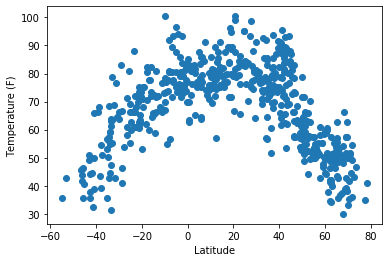

In [5]:
x_values = weather_df['Lat']
y_values = weather_df['Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

## Latitude vs. Humidity Plot

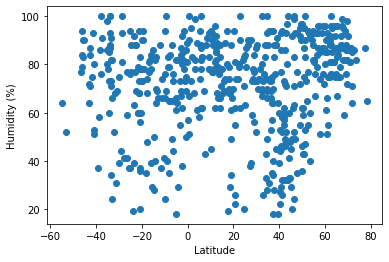

In [6]:
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

## Latitude vs. Cloudiness Plot

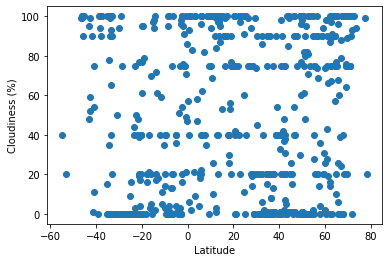

In [7]:
x_values = weather_df['Lat']
y_values = weather_df['Clouds']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

## Latitude vs. Wind Speed Plot

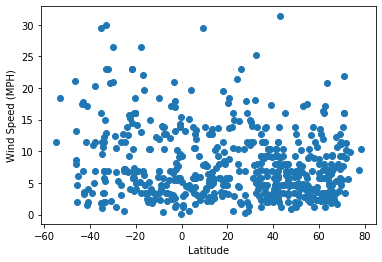

In [8]:
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()

## Linear Regression

In [10]:
#Split DF into Northern Hemisphere Vs. Southern Hemisphere
north_df = weather_df.loc[weather_df["Lat"] > 0]
south_df = weather_df.loc[weather_df["Lat"] < 0]

,Unnamed: 0,City,Lat,Lon,Temp,Humidity,Wind Speed,Clouds
3,3,vaini,-21.20,-175.20,73.40,94,6.93,20
4,4,hobart,-42.88,147.33,37.71,84,6.93,52
6,6,cidreira,-30.18,-50.21,63.81,75,21.00,0
7,7,punta arenas,-53.15,-70.92,42.80,52,18.34,20
9,9,hithadhoo,-0.60,73.08,83.52,69,5.84,100
...,...,...,...,...,...,...,...,...
537,537,micheweni,-4.97,39.83,75.34,82,12.12,4
541,541,te anau,-45.42,167.72,40.46,90,6.06,100
550,550,jacareacanga,-6.22,-57.75,93.20,44,3.36,0
552,552,huarmey,-10.07,-78.15,66.97,66,11.90,14


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.56x +90.78


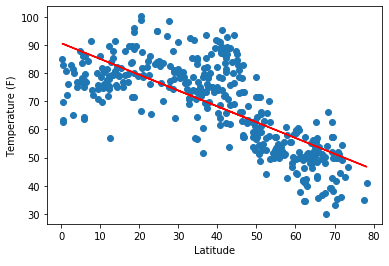

In [20]:
x_values = north_df['Lat']
y_values = north_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.82x +83.6


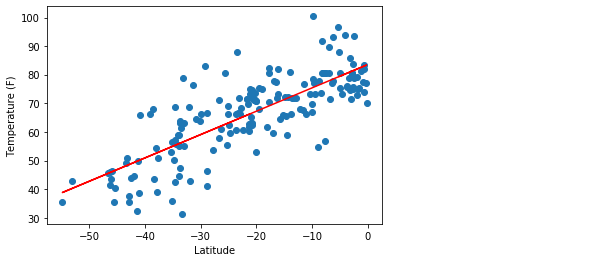

In [21]:
x_values = south_df['Lat']
y_values = south_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.12x +68.29


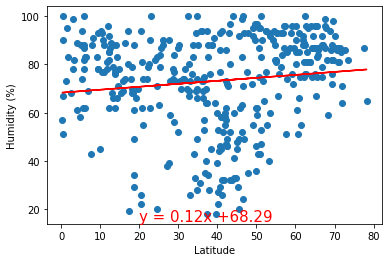

In [22]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.14x +66.81


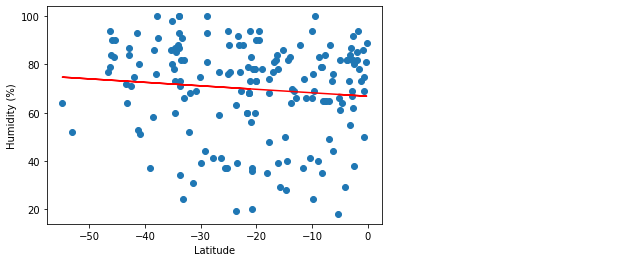

In [29]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.01x +50.39


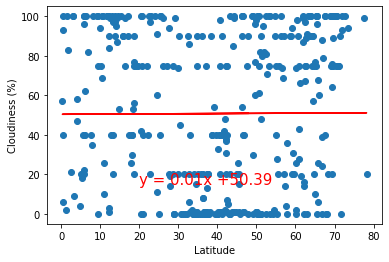

In [24]:
x_values = north_df['Lat']
y_values = north_df['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.49x +33.02


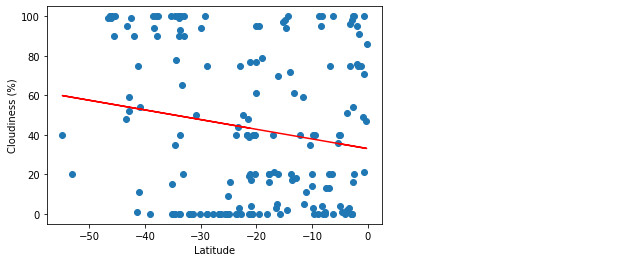

In [25]:
x_values = south_df['Lat']
y_values = south_df['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.01x +7.58


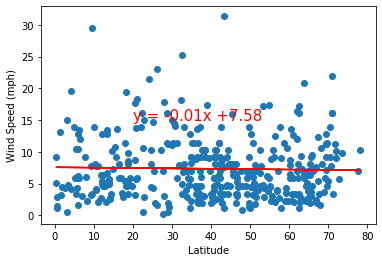

In [26]:
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.07x +7.83


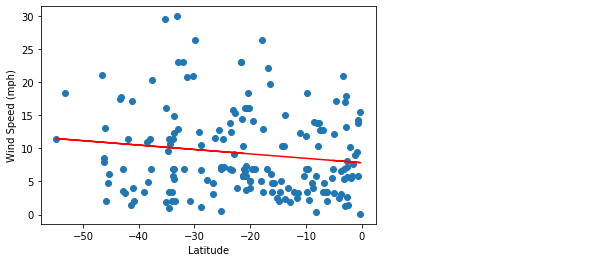

In [27]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.show()